In [1]:
import numpy as np
import geopandas as gpd
import folium
import requests
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import json

In [2]:
#class object procedure 

In [3]:
#get the data from the census api
census_url = 'https://api.census.gov/data/2022/acs/acs5/profile'

params = {
    "get": "NAME,DP05_0001E,DP05_0002E,DP05_0003E,DP05_0073PE,DP05_0073E,DP05_0064PE,DP05_0064E,DP05_0060PE,DP05_0060E,DP05_0061PE,DP05_0061E,DP05_0063PE,DP05_0063E,DP05_0044PE,DP05_0044E,DP03_0052PE,DP03_0052E,DP03_0053PE,DP03_0053E,DP03_0054PE,DP03_0054E,DP03_0055PE,DP03_0055E,DP03_0056PE,DP03_0056E,DP03_0057PE,DP03_0057E,DP03_0058PE,DP03_0058E,DP03_0059PE,DP03_0059E,DP03_0097PE,DP03_0129E",
    "for": "tract:*",
    "in": "state:32",
    "key": "70e45fe92b3388139fe141a2db2d6d6bab65d94d"
}
response = requests.get(census_url, params=params)



In [4]:

#create a dictionary to store the descriptions of the variables
descriptions = {
    "NAME": "Estimate!!Total:!!County Name",
    "DP05_0001E" : "Estimate!!SEX AND AGE!!Total population",
    "DP05_0002E" : "Estimate!!SEX AND AGE!!Total population!!Male",
    "DP05_0003E" : "Estimate!!SEX AND AGE!!Total population!!Female	Population",
    "DP05_0073PE" : "Estimate!!Total:!!Total Population",
    "DP05_0064PE" : "Estimate!!RACE!!Total population!!Two or More Races!!Black or African American and Some Other Race	",
    "DP05_0060PE" : "Percent!!RACE!!Total population!!Two or More Races!!White and American Indian and Alaska Native",
    "DP05_0061PE" : "Percent!!RACE!!Total population!!Two or More Races!!White and Asian",
    "DP05_0063PE" : "Percent!!RACE!!Total population!!Two or More Races!!Black or African American and American Indian and Alaska Native",
    "DP05_0044PE" : "Estimate!!RACE!!Total population!!One race!!Asian",
    "DP03_0052PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$10,000 to $14,999",
    "DP03_0053E" : "Estimate!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!Less than $10,000",
    "DP03_0054PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$15,000 to $24,999",
    "DP03_0054E" : "Estimate!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$15,000 to $24,999",
    "DP03_0055PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$25,000 to $34,999",
    "DP03_0055E" : "Estimate!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$25,000 to $34,999",
    "DP03_0056PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$35,000 to $49,999",
    "DP03_0056E" : "Estimate!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$35,000 to $49,999",
    "DP03_0057PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$50,000 to $74,999",
    "DP03_0057E" : "Estimate!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$50,000 to $74,999",
    "DP03_0058PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$75,000 to $99,999",
    "DP03_0058E" : "Estimate!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$75,000 to $99,999",
    "DP03_0059PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$100,000 to $149,999",
    "DP03_0059E" : "Estimate!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$100,000 to $149,999",
    "DP03_0066PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Social Security",
    "DP03_0067E" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Social Security!!Mean Social Security income (dollars)",
    "DP03_0072PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!With cash public assistance income",
    "DP03_0073E" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!With cash public assistance income!!Mean cash public assistance income (dollars)",
    "DP03_0074PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Food Stamp/SNAP benefits in the past 12 months",
    "DP03_0097PE" : "Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance",
    "DP03_0119PE" : "Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families",
    "DP03_0129E" : "Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years",
    "state" : "State FIPS Code",
    "county": "County FIPS Code",
    "tract": "Census Tract Code"
}

descriptions_2 = {
    "NAME": "Estimate!!Total:!!County Name",
    "DP03_0052PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$10,000 to $14,999",
    "DP03_0053PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!Less than $10,000",
    "DP03_0053PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$10,000 to $14,999",
    "DP03_0054PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$15,000 to $24,999",
    "DP03_0055PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$25,000 to $34,999",
    "DP03_0056PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$35,000 to $49,999",
    "DP03_0057PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$50,000 to $74,999",
    "DP03_0058PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$75,000 to $99,999",
    "DP03_0059PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$100,000 to $149,999",
    "DP03_0066PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Social Security",
    "DP03_0067E" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Social Security!!Mean Social Security income (dollars)",
    "DP03_0072PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!With cash public assistance income",
    "DP03_0073E" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!With cash public assistance income!!Mean cash public assistance income (dollars)",
    "DP03_0074PE" : "Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Food Stamp/SNAP benefits in the past 12 months",
    "DP03_0097PE" : "Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance",
    "DP03_0119PE" : "Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families",
    "state" : "State FIPS Code",
    "county": "County FIPS Code",
    "tract": "Census Tract Code"
}

# split only if !! is present in the descriptions into the variable name and the description
#for key, value in descriptions.items():
   # if "!!" in value:
        #value = value.split("!!")
        #if len(value) > 2:
            #descriptions[key] = value[-1]
        #else:
            #descriptions[key] = value[2]

print(descriptions)

{'NAME': 'Estimate!!Total:!!County Name', 'DP05_0001E': 'Estimate!!SEX AND AGE!!Total population', 'DP05_0002E': 'Estimate!!SEX AND AGE!!Total population!!Male', 'DP05_0003E': 'Estimate!!SEX AND AGE!!Total population!!Female\tPopulation', 'DP05_0073PE': 'Estimate!!Total:!!Total Population', 'DP05_0064PE': 'Estimate!!RACE!!Total population!!Two or More Races!!Black or African American and Some Other Race\t', 'DP05_0060PE': 'Percent!!RACE!!Total population!!Two or More Races!!White and American Indian and Alaska Native', 'DP05_0061PE': 'Percent!!RACE!!Total population!!Two or More Races!!White and Asian', 'DP05_0063PE': 'Percent!!RACE!!Total population!!Two or More Races!!Black or African American and American Indian and Alaska Native', 'DP05_0044PE': 'Estimate!!RACE!!Total population!!One race!!Asian', 'DP03_0052PE': 'Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$10,000 to $14,999', 'DP03_0053E': 'Estimate!!INCOME AND BENEFITS (IN 2022 INFLATION-A

                    Estimate!!Total:!!County Name  \
0     Census Tract 9501; Churchill County; Nevada   
1  Census Tract 9503.01; Churchill County; Nevada   
2  Census Tract 9503.02; Churchill County; Nevada   
3     Census Tract 9504; Churchill County; Nevada   
4     Census Tract 9505; Churchill County; Nevada   

   Estimate!!SEX AND AGE!!Total population  \
0                                     2265   
1                                     4127   
2                                     5539   
3                                     1004   
4                                     1425   

   Estimate!!SEX AND AGE!!Total population!!Male  \
0                                           1259   
1                                           2210   
2                                           2907   
3                                            693   
4                                            721   

   Estimate!!SEX AND AGE!!Total population!!Female\tPopulation  \
0                        

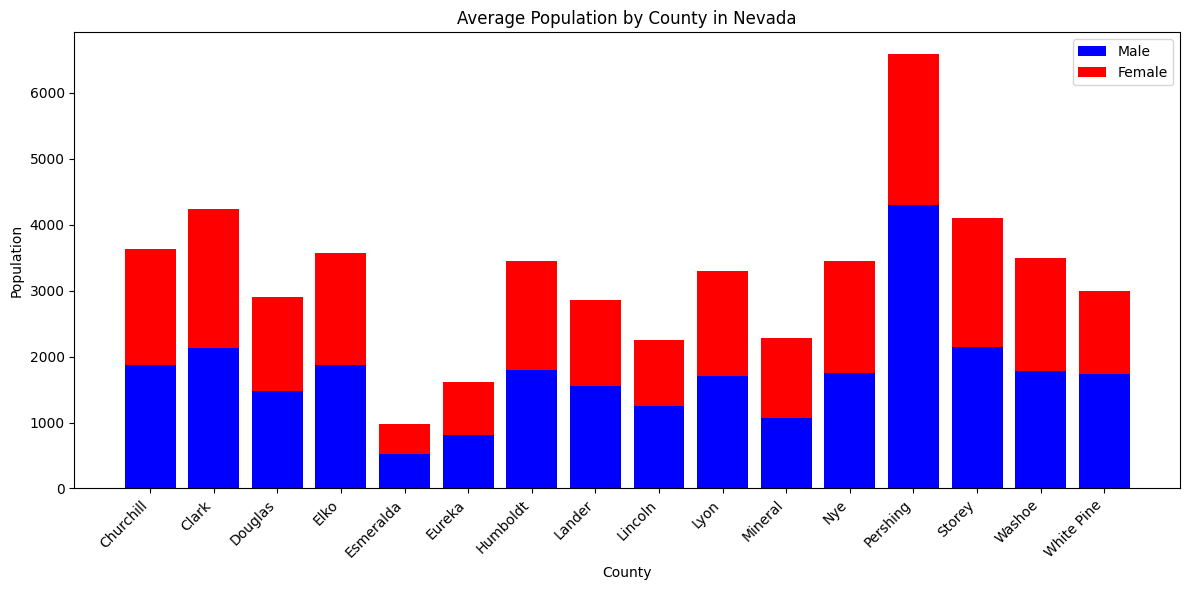

In [5]:

#if the response is successful, create a dataframe with the data
if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data[1:], columns=data[0])

#if the response is not successful, print the error
else:
    print(f"Error: {response.status_code}")
    print(response.text)

nevada_census = df.rename(columns=descriptions)

#convert the dataframe to a csv file
nevada_census.to_csv("Nevada_census.csv", index=False)


# Extract county names 
nevada_census['County'] = nevada_census['Estimate!!Total:!!County Name'].str.extract(r'Census Tract [^;]+; ([^;]+) County')

# Convert population columns to numeric, replacing any errors with NaN
nevada_census['Estimate!!SEX AND AGE!!Total population'] = pd.to_numeric(nevada_census['Estimate!!SEX AND AGE!!Total population'], errors='coerce')
nevada_census['Estimate!!SEX AND AGE!!Total population!!Male'] = pd.to_numeric(nevada_census['Estimate!!SEX AND AGE!!Total population!!Male'], errors='coerce')
nevada_census['Estimate!!SEX AND AGE!!Total population!!Female\tPopulation'] = pd.to_numeric(nevada_census['Estimate!!SEX AND AGE!!Total population!!Female\tPopulation'], errors='coerce')


# Drop any rows where County is NaN
nevada_census = nevada_census.dropna(subset=['County'])

# Group by county and calculate mean population
county_population = nevada_census.groupby('County').mean({
    'Estimate!!SEX AND AGE!!Total population!!Male': 'mean',
    'Estimate!!SEX AND AGE!!Total population!!Female\tPopulation': 'mean'
}).reset_index()

print(nevada_census.head())

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(county_population['County'], county_population['Estimate!!SEX AND AGE!!Total population!!Male'], 
        color='blue', label='Male')
plt.bar(county_population['County'], county_population['Estimate!!SEX AND AGE!!Total population!!Female\tPopulation'],
        bottom=county_population['Estimate!!SEX AND AGE!!Total population!!Male'], color='red', label='Female')

plt.title('Average Population by County in Nevada')
plt.xlabel('County')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()



In [6]:
df = pd.read_csv('Nevada_census.csv')

#clean the column names
df.columns = (
    df.columns
     .str.strip()  # remove leading/trailing spaces
      .str.replace('!!',"_", regex = False)
      .str.replace(r'\s+', '_', regex=True)  # replace whitespace with underscore
      .str.replace(r'[^\w\s]', '', regex=True)  # remove special characters
      .str.replace('__+', '_', regex=True)  # replace multiple underscores with one
      .str.lower()  # lowercase all column names
)

df.to_csv('Nevada_census_cleaned.csv', index=False)

<Figure size 1000x600 with 0 Axes>

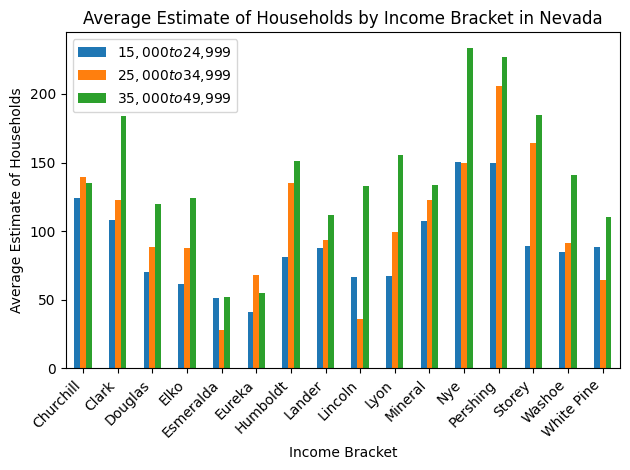

In [7]:
df = pd.read_csv('nevada_census_cleaned.csv')

#income bracket columns    
income_bracket_columns = [col for col in df.columns if 'estimate' in col and 'income' in col]
mean_dict = {col for col in income_bracket_columns if 'estimate' in col and 'income' in col}
income_bracket_columns = income_bracket_columns[:4]


dollar_ranges = {}
for col in income_bracket_columns:
    match = re.search(r'(\d{4,6})_to_(\d{4,6})', col)
    if match:
        low, high = match.groups()
        formatted = f"${int(low):,} to ${int(high):,}"
        dollar_ranges[col] = formatted


df.rename(columns=dollar_ranges, inplace=True)

# Create the mean dictionary for the groupby operation
mean_dict = {new_name: 'mean' for new_name in dollar_ranges.values()}

#extract the county name from the estimate_total_county_name column
df['County'] = df['estimate_total_county_name'].str.extract(r'Census Tract [^;]+; ([^;]+) County')

#group by county and calculate the mean of the income bracket columns
plot_df = df.groupby('County').mean(mean_dict).reset_index()
columns = list(mean_dict.keys()) + ['County']
plot_df = plot_df[columns]

#plot the income bracket means
plt.figure(figsize=(10, 6))
plot_df.plot(kind='bar', x='County', y=dollar_ranges.values())
plt.title('Average Estimate of Households by Income Bracket in Nevada')
plt.ylabel('Average Estimate of Households')
plt.xlabel('Income Bracket')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#addition to the code, use the actual estimate divided instead of the percentage. This data is pre-aggregated 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4674 entries, 0 to 4673
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   County                  4584 non-null   object
 1   Income Bracket          4674 non-null   object
 2   Estimate of Households  4674 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 109.7+ KB
None
      County      Income Bracket  Estimate of Households
0  Churchill  $15,000 to $24,999                      25
1  Churchill  $15,000 to $24,999                     232
2  Churchill  $15,000 to $24,999                     127
3  Churchill  $15,000 to $24,999                       5
4  Churchill  $15,000 to $24,999                      56


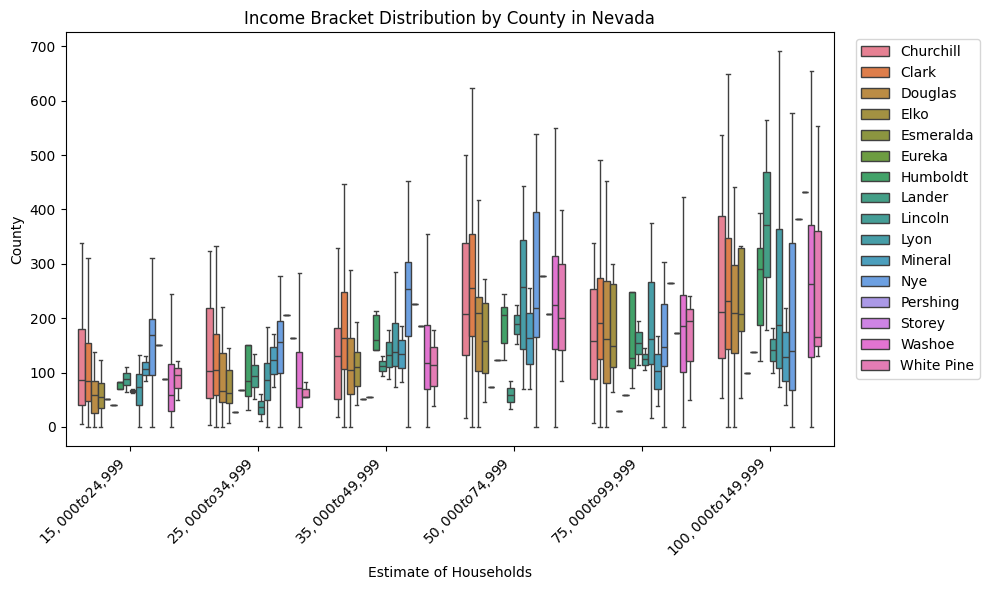

In [8]:
df = pd.read_csv('nevada_census_cleaned.csv')

#income bracket columns    
income_bracket_columns = [col for col in df.columns if 'estimate' in col and 'income' in col]
mean_dict = {col for col in income_bracket_columns if 'estimate' in col and 'income' in col}


dollar_ranges = {}
for col in income_bracket_columns:
    match = re.search(r'(\d{4,6})_to_(\d{4,6})', col)
    if match:
        low, high = match.groups()
        formatted = f"${int(low):,} to ${int(high):,}"
        dollar_ranges[col] = formatted


df.rename(columns=dollar_ranges, inplace=True)

# Create the mean dictionary for the groupby operation
mean_dict = {new_name: 'mean' for new_name in dollar_ranges.values()}

#extract the county name from the estimate_total_county_name column
df['County'] = df['estimate_total_county_name'].str.extract(r'Census Tract [^;]+; ([^;]+) County')

#group by county 
plot_df = df.groupby('County').mean(mean_dict).reset_index()
columns = list(mean_dict.keys()) + ['County']
plot_df = plot_df[columns]

#melt plot_df by income bracket, percentage of households and county
melted_df = df.melt(id_vars=['County'], 
                         value_vars=dollar_ranges.values(), 
                         var_name='Income Bracket', 
                         value_name='Estimate of Households')
print(melted_df.info())
print(melted_df.head())

#plot the income bracket means
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x='Income Bracket', y = 'Estimate of Households', hue='County', showfliers=False)
plt.title('Income Bracket Distribution by County in Nevada')
plt.ylabel('County')
plt.xlabel('Estimate of Households')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

{'estimate_income_and_benefits_in_2022_inflationadjusted_dollars_total_households_15000_to_24999': '$15,000 to $24,999', 'estimate_income_and_benefits_in_2022_inflationadjusted_dollars_total_households_25000_to_34999': '$25,000 to $34,999', 'estimate_income_and_benefits_in_2022_inflationadjusted_dollars_total_households_35000_to_49999': '$35,000 to $49,999', 'estimate_income_and_benefits_in_2022_inflationadjusted_dollars_total_households_50000_to_74999': '$50,000 to $74,999', 'estimate_income_and_benefits_in_2022_inflationadjusted_dollars_total_households_75000_to_99999': '$75,000 to $99,999', 'estimate_income_and_benefits_in_2022_inflationadjusted_dollars_total_households_100000_to_149999': '$100,000 to $149,999'}


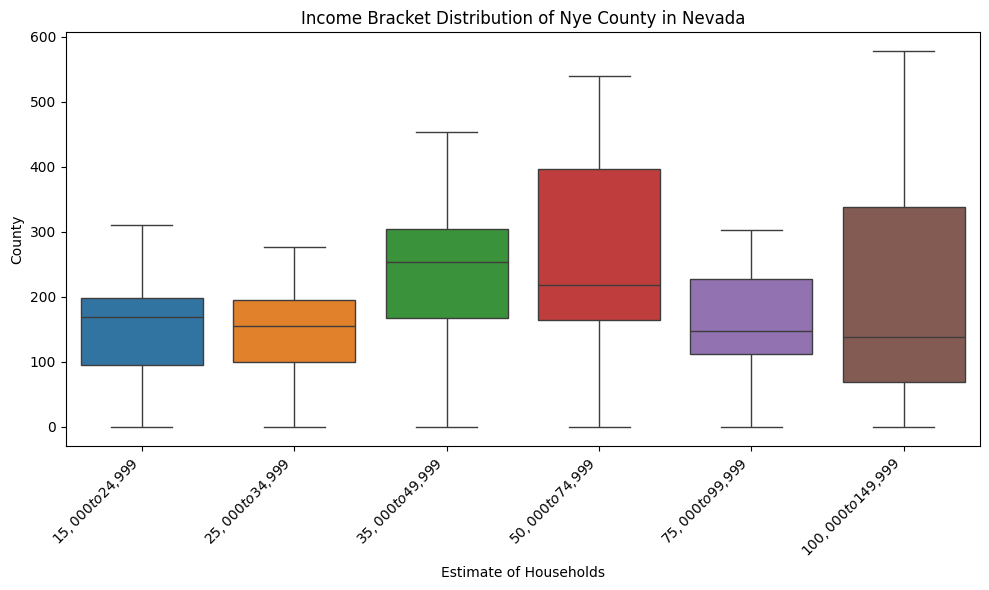

In [9]:
df = pd.read_csv('nevada_census_cleaned.csv')

#income bracket columns    
income_bracket_columns = [col for col in df.columns if 'estimate' in col and 'income' in col]
mean_dict = {col for col in income_bracket_columns if 'estimate' in col and 'income' in col}


dollar_ranges = {}
for col in income_bracket_columns:
    match = re.search(r'(\d{4,6})_to_(\d{4,6})', col)
    if match:
        low, high = match.groups()
        formatted = f"${int(low):,} to ${int(high):,}"
        dollar_ranges[col] = formatted
print(dollar_ranges)


df.rename(columns=dollar_ranges, inplace=True)

# Create the mean dictionary for the groupby operation
mean_dict = {new_name: 'mean' for new_name in dollar_ranges.values()}

#extract the county name from the estimate_total_county_name column
df['County'] = df['estimate_total_county_name'].str.extract(r'Census Tract [^;]+; ([^;]+) County')


#melt plot_df by income bracket, percentage of households and county
melted_df = df.melt(id_vars=['County'], 
                         value_vars=dollar_ranges.values(), 
                         var_name='Income Bracket', 
                         value_name='Estimate of Households')

#Insert county name here
county_name = 'Nye'
melted_df_county = melted_df[melted_df['County'] == county_name] 

#plot the income bracket means
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df_county, x='Income Bracket', y = 'Estimate of Households', hue='Income Bracket', showfliers=False)
plt.title(f'Income Bracket Distribution of {county_name} County in Nevada')
plt.ylabel('County')
plt.xlabel('Estimate of Households')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
import plotly.io as pio
pio.renderers.default = "browser" 
import geopandas as gpd

# Read the shapefile
gdf = gpd.read_file('tl_2022_32_tract.shp')

# Save to GeoJSON
gdf.to_file('nevada_tracts_2022.json', driver='GeoJSON')

print("nevada_tracts_2022.json has been created.")

df = pd.read_csv('Nevada_census.csv')

with open("nevada_tracts_2022.json") as f:
    geojson = json.load(f)

df['GEOID'] = df['State FIPS Code'].astype(str).str.zfill(2) + \
              df['County FIPS Code'].astype(str).str.zfill(3) + \
              df['Census Tract Code'].astype(str).str.zfill(6)
print(df['GEOID'].head())

color_column = 'Percent!!INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Total households!!$100,000 to $149,999'
df[color_column] = pd.to_numeric(df[color_column], errors='coerce')
df.dropna(subset=[color_column], inplace=True)

df = df[df[color_column] >= 0]


fig = px.choropleth(
    df,
    geojson=geojson,
    locations='GEOID',
    featureidkey="properties.GEOID",
    color=color_column,
    color_continuous_scale="Viridis",
    title="Nevada: % of Households Earning $15k-$25k"
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()


nevada_tracts_2022.json has been created.
0    32001950100
1    32001950301
2    32001950302
3    32001950400
4    32001950500
Name: GEOID, dtype: object


In [11]:
import plotly.io as pio
pio.renderers.default = "browser" 
import geopandas as gpd

gdf = gpd.read_file('tl_2022_32_tract.shp')

gdf.to_file('nevada_tracts_2022.json', driver='GeoJSON')


with open("nevada_tracts_2022.json") as f:
    geojson = json.load(f)

df = pd.read_csv('nevada_census_cleaned.csv')

df['GEOID'] = df['state_fips_code'].astype(str).str.zfill(2) + \
              df['county_fips_code'].astype(str).str.zfill(3) + \
              df['census_tract_code'].astype(str).str.zfill(6)


df = df.rename(columns={
    'percent_health_insurance_coverage_civilian_noninstitutionalized_population_with_health_insurance_coverage_with_private_health_insurance': 'health_insurance_coverage'
})

# Use the shorter column name
color_column = 'health_insurance_coverage'


df[color_column] = pd.to_numeric(df[color_column], errors= 'coerce')
df.dropna(subset=[color_column], inplace = True)
print(df['GEOID'])
print("Sample GEOIDs in GeoJSON:", [f['properties']['GEOID'] for f in geojson['features'][:5]])

df = df[df[color_column] >= 0]

print(df[color_column])

# Create the choropleth
fig = px.choropleth_map(
    df,
    geojson=geojson,
    locations='GEOID',
    featureidkey='properties.GEOID',
    color=color_column,
    color_continuous_scale='Viridis',
    map_style='open-street-map',
    zoom=5,
    center={"lat": 38.5, "lon": -117.0}, 
    opacity=0.6,
    title='Nevada: Health Insurance Coverage by Census Tract'
)

# Update the layout to fit the data
fig.update_geos(fitbounds="locations", visible=False)

# Show the plot
fig.show()



0      32001950100
1      32001950301
2      32001950302
3      32001950400
4      32001950500
          ...     
774    32510000800
775    32510000900
776    32510001001
777    32510001002
778    32510990000
Name: GEOID, Length: 779, dtype: object
Sample GEOIDs in GeoJSON: ['32023960412', '32031003519', '32031002303', '32031003516', '32031003520']
0      69.7
1      50.4
2      63.4
3      89.2
4      47.8
       ... 
773    66.3
774    74.8
775    58.0
776    41.7
777    70.4
Name: health_insurance_coverage, Length: 771, dtype: float64


In [12]:
#get a function that takes in a coounty and other variables and vizualizes the data automatically. 
#individually the function takes in a county and a variable and vizualizes the data. 
#aggerate across census tracts and plot the data. 
#reminder that you cannot take the mean of the actual percentage 
#

In [14]:
census_url = 'https://api.census.gov/data/2022/acs/acs5/profile'

variables = ["NAME","DP05_0001E","DP05_0002E","DP05_0004E"]
print(variables)

def data_extraction (url, variables):
    params = {
    "get": ",".join(variables),
    "for": "tract:*",
    "in": "state:32",
    "key": "70e45fe92b3388139fe141a2db2d6d6bab65d94d"
    }
    response = requests.get(census_url, params=params)
    #if the response is successful, create a dataframe with the data
    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame(data[1:], columns=data[0])

    #if the response is not successful, print the error
    else:
        print(f"Error: {response.status_code}")
        print(response.text)
    
    df.to_csv('variable_specific_df.csv', index= "False")
    print("DF created with variables", variables)
    return df

def rename_function(url, variables):
    df = data_extraction(url, variables)
    df = df.rename(columns=descriptions)
    #clean the column names
    df.columns = (
        df.columns
        .str.strip()  # remove leading/trailing spaces
        .str.replace('!!',"_", regex = False)
        .str.replace(r'\s+', '_', regex=True)  # replace whitespace with underscore
        .str.replace(r'[^\w\s]', '', regex=True)  # remove special characters
        .str.replace('__+', '_', regex=True)  # replace multiple underscores with one
        .str.lower()  # lowercase all column names
        )

    df.to_csv('function_cleaned_df.csv', index=False)
    return(df)

def barplot_function(census_url, variables):
    df = rename_function(census_url, variables)
    df['county'] = df['estimate_total_county_name'].str.extract(r'Census Tract [^;]+; ([^;]+) County')

    # Convert population columns to numeric, replacing any errors with NaN
    df['estimate_sex_and_age_total_population'] = pd.to_numeric(df['estimate_sex_and_age_total_population'], errors='coerce')
    df['estimate_sex_and_age_total_population_male'] = pd.to_numeric(df['estimate_sex_and_age_total_population_male'], errors='coerce')
    df['estimate_sex_and_age_total_population_female_population'] = pd.to_numeric(df['estimate_sex_and_age_total_population_female_population'], errors='coerce')


    # Drop any rows where County is NaN
    df = df.dropna(subset=['county'])

    # Group by county and calculate mean population
    county_population = df.groupby('county').mean({
        'estimate_sex_and_age_total_population_male': 'mean',
        'estimate_sex_and_age_total_population_female_population': 'mean'
    }).reset_index()

    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.bar(county_population['county'], county_population['estimate_sex_and_age_total_population_male'], 
            color='blue', label='Male')
    plt.bar(county_population['county'], county_population['estimate_sex_and_age_total_population_female_population'],
            bottom=county_population['estimate_sex_and_age_total_population_male'], color='red', label='Female')

    plt.title('Average Population by County in Nevada')
    plt.xlabel('County')
    plt.ylabel('Population')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

barplot_function(census_url, variables)


    

    



    

['NAME', 'DP05_0001E', 'DP05_0002E', 'DP05_0004E']
DF created with variables ['NAME', 'DP05_0001E', 'DP05_0002E', 'DP05_0004E']


KeyError: 'estimate_sex_and_age_total_population_female_population'